TITLE: Lab Assignment 1: Introduction to Speech Processing

DATASET SESCIPTION : The LJ Speech Dataset is a publicly available single-speaker speech corpus widely used in research and academic experiments related to speech processing and text-to-speech systems. It consists of short-duration audio recordings paired with their corresponding textual transcriptions. In this experiment, a single .wav audio file from the LJ Speech Dataset was used for analysis. The dataset contains English speech recorded by a single female speaker (LJ) under controlled studio conditions, ensuring high-quality and noise-free recordings. The audio files are stored in WAV format with a sampling rate of 22,050 Hz and a bit depth of 16-bit PCM. The speech content is derived from read passages of non-fiction books, resulting in clear articulation and consistent pronunciation. Due to its clean signal quality and uniform recording setup, the LJ Speech Dataset allows clear identification of voiced, unvoiced, and silence regions, making it well suited for basic speech processing tasks such as waveform visualization, signal slicing, normalization, amplification, and sampling rate modification performed in this experiment.

Objective of the Experiment

The objective of this experiment is to introduce the fundamentals of speech signal processing through practical analysis and manipulation of a digital speech signal. Specifically, the objectives are:

To load and analyze a speech signal stored in .wav format obtained from the LJ Speech Dataset.

To understand and examine basic properties of a speech signal such as sampling rate, number of samples, total duration, and active speech duration.

To visualize the time-domain waveform of the speech signal and observe how the amplitude varies over time.

To perform basic speech signal operations including:

Slicing a speech signal to extract a fixed duration segment

Normalizing the speech signal

Amplifying and de-amplifying the signal

Up-sampling and down-sampling the signal

To visually identify voiced, unvoiced, and silence regions in the speech waveform.

To gain hands-on experience in using Python-based tools for speech signal analysis and manipulation.

In [ ]:
pip install simpleaudio


  Using cached simpleaudio-1.0.4.tar.gz (2.0 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for simpleaudio
Failed to build simpleaudio
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: Building 'simpleaudio' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'simpleaudio'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-310
      creating build\lib.win-amd64-cpython-310\simpleaudio
      copying simpleaudio\__init__.py -> build\lib.win-amd64-cpython-310\simpleaudio
      copying simpleaudio\shiny.py -> build\lib.win-amd64-cpython-310\simpleaudio
      copying simpleaudio\fu

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import librosa
from scipy.signal import resample


In [ ]:

file_path = "LJ025-0076.wav"   
speech, sr = sf.read(file_path)


In [ ]:

print("Sampling Rate:", sr, "Hz")


bit_depth = speech.dtype
print("Bit Depth:", bit_depth)


Sampling Rate: 22050 Hz
Bit Depth: float64


In [ ]:

file_path = "LJ025-0076.wav"  
speech, sr = librosa.load(file_path, sr=None)


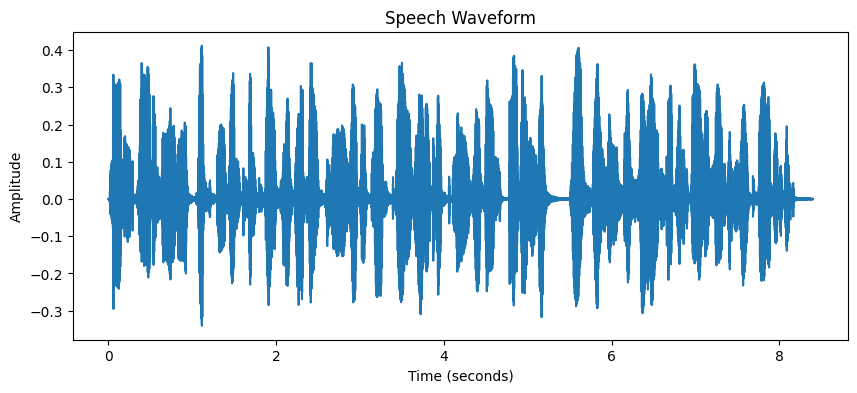

In [14]:
time = np.linspace(0, len(speech)/sr, len(speech))

plt.figure(figsize=(10,4))
plt.plot(time, speech)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Speech Waveform")
plt.show()


In [15]:
num_samples = len(speech)
duration = num_samples / sr

print("Sample Rate:", sr)
print("Number of Samples:", num_samples)
print("Total Duration:", duration, "seconds")


Sample Rate: 22050
Number of Samples: 185146
Total Duration: 8.396643990929705 seconds


In [16]:
energy = speech**2
threshold = 0.01 * np.max(energy)
active_samples = np.sum(energy > threshold)
active_duration = active_samples / sr

print("Active Speech Duration:", active_duration, "seconds")


Active Speech Duration: 2.7208163265306125 seconds


In [17]:
slice_2sec = speech[:2*sr]


In [18]:
normalized_signal = slice_2sec / np.max(np.abs(slice_2sec))


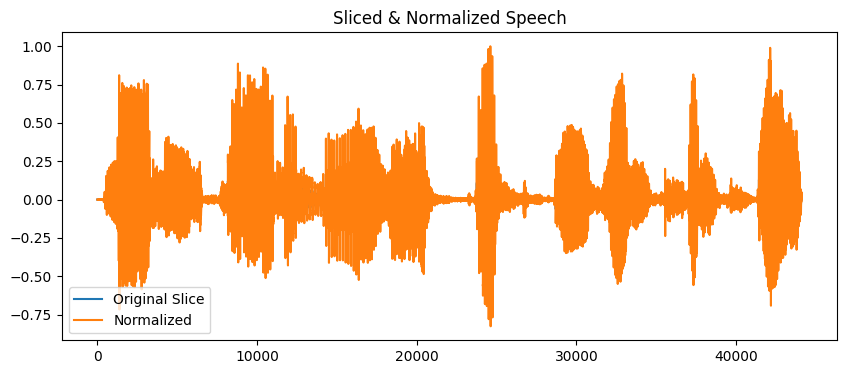

In [19]:
plt.figure(figsize=(10,4))
plt.plot(slice_2sec, label="Original Slice")
plt.plot(normalized_signal, label="Normalized")
plt.legend()
plt.title("Sliced & Normalized Speech")
plt.show()


In [20]:
amplified = speech * 2
deamplified = speech * 0.5


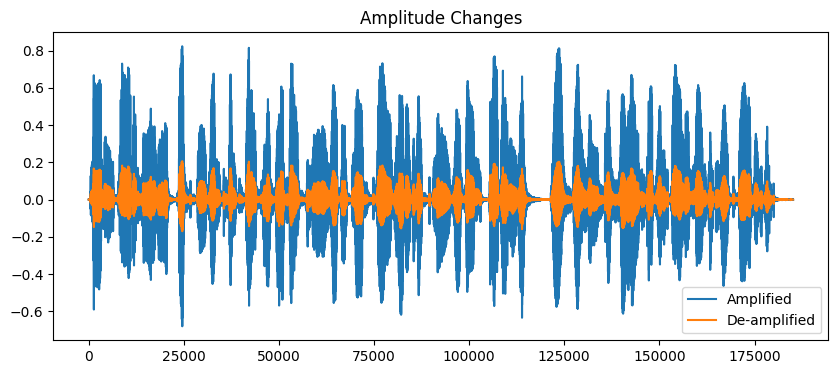

In [21]:
plt.figure(figsize=(10,4))
plt.plot(amplified, label="Amplified")
plt.plot(deamplified, label="De-amplified")
plt.legend()
plt.title("Amplitude Changes")
plt.show()


In [22]:
upsampled = resample(speech, len(speech)*2)


In [23]:
downsampled = resample(speech, len(speech)//2)


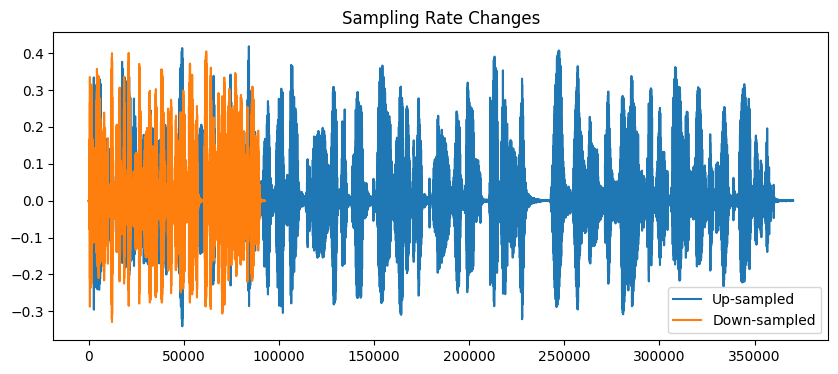

In [24]:
plt.figure(figsize=(10,4))
plt.plot(upsampled, label="Up-sampled")
plt.plot(downsampled, label="Down-sampled")
plt.legend()
plt.title("Sampling Rate Changes")
plt.show()


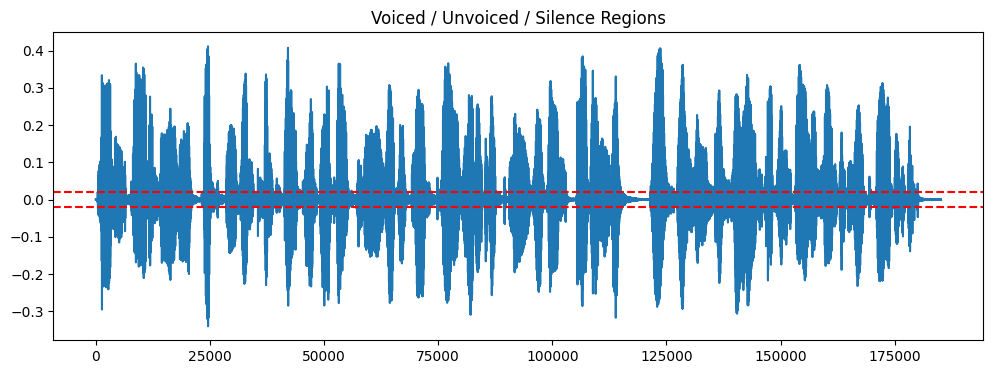

In [25]:
plt.figure(figsize=(12,4))
plt.plot(speech)
plt.axhline(y=0.02, color='r', linestyle='--')
plt.axhline(y=-0.02, color='r', linestyle='--')
plt.title("Voiced / Unvoiced / Silence Regions")
plt.show()


CONCLUSION : In this experiment, a speech signal from the LJ Speech Dataset was analyzed using basic speech processing techniques. The time-domain waveform visualization helped in understanding amplitude variations over time. Operations such as slicing, normalization, amplification, and sampling rate modification demonstrated how different signal processing methods affect speech signals. The experiment also enabled visual identification of voiced, unvoiced, and silence regions.